# Assignment 3
## Rasmus Durgé, Anton Danielli
### 15 hours , 15 hours

In [3]:
#import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from collections import Counter

In [4]:
#Read the data
df = pd.read_csv('data_all.csv')

## Scatter plot of Phi and Psi angles.
First we do a scatter plot of the distribution of the Psi and Psi angles of the proteins. The scatter plots provides us with a initial map of where the most common combinations are located in terms of angles. The angles are measured in degrees.

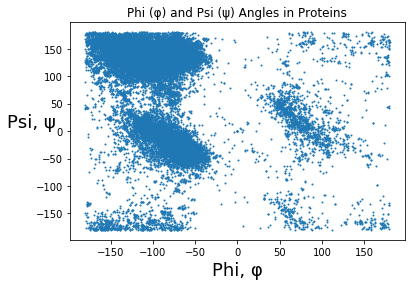

In [5]:
#1a
# Assign X, y values and plot
df.plot.scatter(x='phi', y='psi', s=1)

# Create title and labels
plt.title('Phi (φ) and Psi (ψ) Angles in Proteins')
plt.xlabel('Phi, φ', size=18)
plt.ylabel('Psi, ψ', rotation="horizontal", size=18)

# Increase size of figure
plt.rcParams['figure.figsize'] = [10,10]

plt.show()

## Heat map of Phi and Psi angles.
Next we do a heat map of the same data. This provides us with yet another image of the most common distribution areas. A stronger color indicates a more dense distribution.

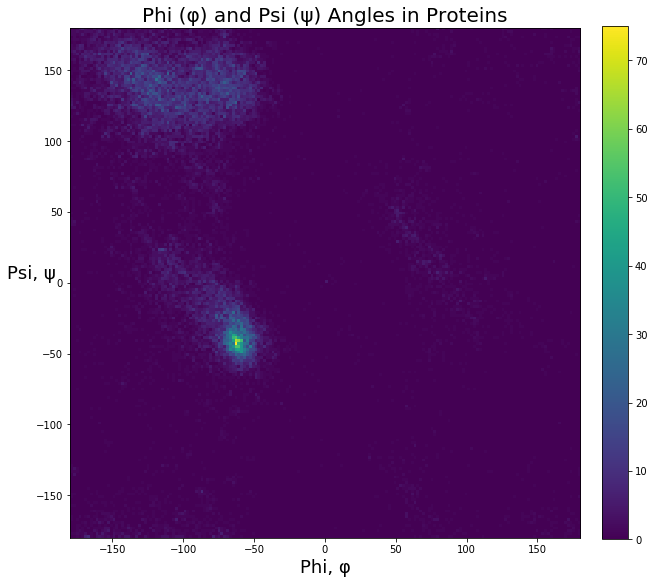

In [6]:
#1b
# Setup heatmap
heatmap, xedges, yedges = np.histogram2d(x=df['phi'], y=df['psi'], bins=(180, 180))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower')

# Create title and labels
plt.title('Phi (φ) and Psi (ψ) Angles in Proteins', size=20)
plt.xlabel('Phi, φ', size=18)
plt.ylabel('Psi, ψ', rotation="horizontal", size=18)

plt.colorbar(fraction=0.046, pad=0.04)


# Increase size of figure
plt.rcParams['figure.figsize'] = [10, 10]

plt.show()

## K means clustering for Phi and Psi
Next we did the K means method to make clusters of the data. The algorithm pairs data points into cluster based on a value of K and euclidian distance between points. The value of K determines the amount of clusters we want and is set by the user.

## Appropriate value for k

To select an appropriate value for k we created plots with  k-values ranging from 2-6. With these plots we used a silhouette score to determine a suitable k. We received the highest score with k = 3 as seen below.

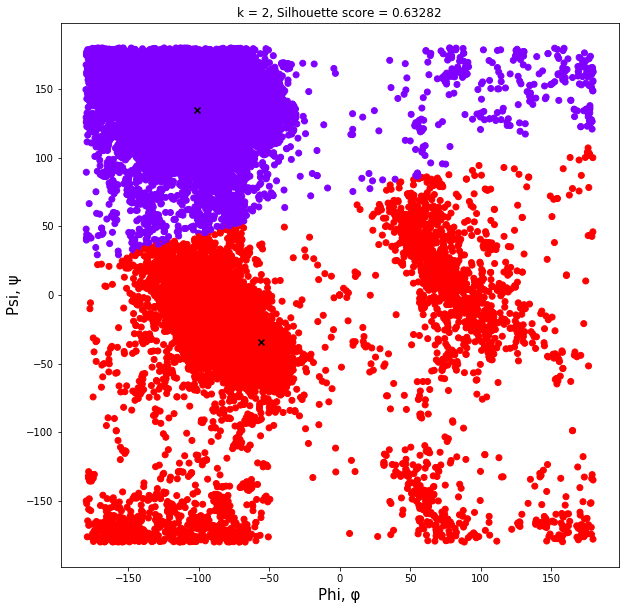

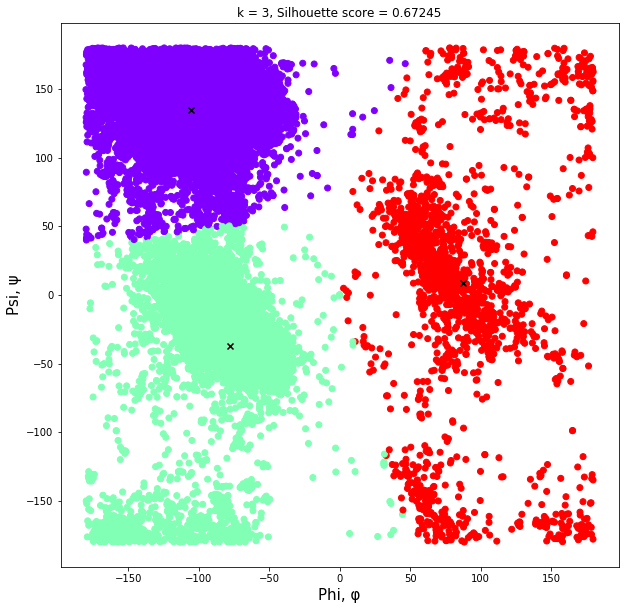

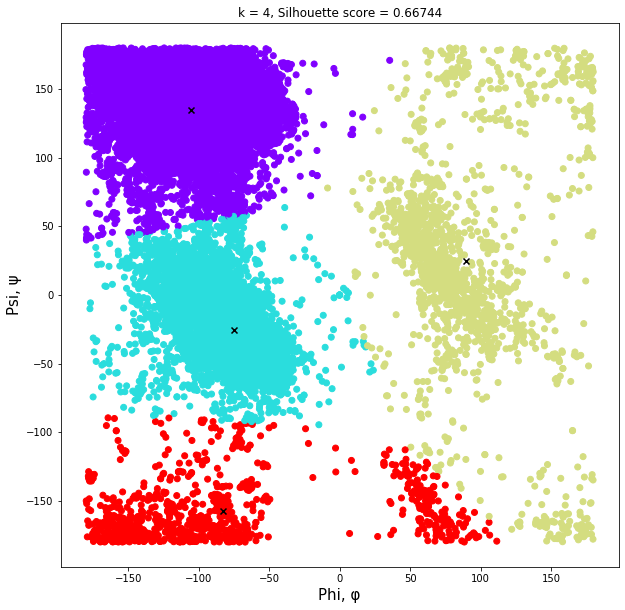

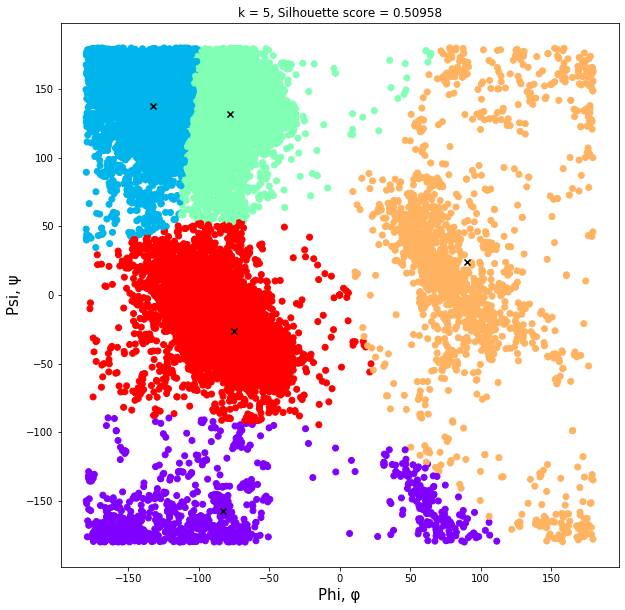

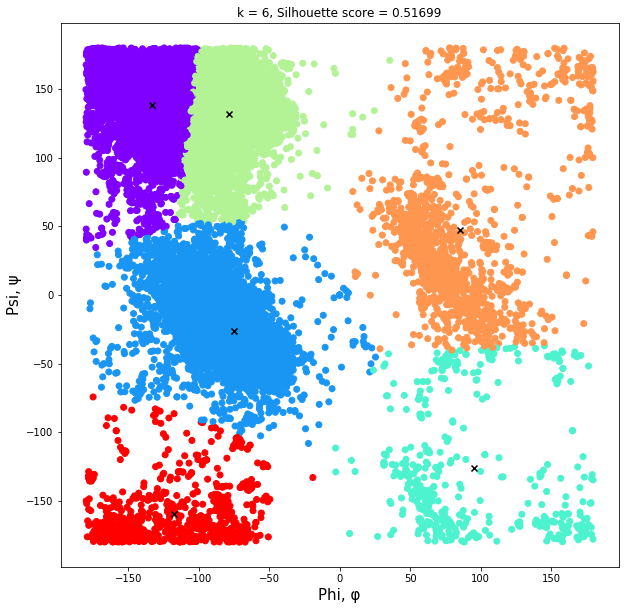

In [16]:
#2a
# Create a for loop that generates plots for k=2-6
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df[["phi", "psi"]])

    plt.scatter(x=df["phi"], y=df['psi'], 
                c=kmeans.labels_, 
                cmap='rainbow')

    plt.scatter(kmeans.cluster_centers_[:, 0], 
                kmeans.cluster_centers_[:, 1], 
                c='black', 
                marker='x')
        
    plt.title(f"k = {k}, Silhouette score = "
                     f"{silhouette_score(df[['phi', 'psi']], kmeans.labels_):,.5f}")
    plt.xlabel('Phi, φ', size=15)
    plt.ylabel('Psi, ψ', size=15)
    
    plt.show()

## Cluster reasonability
We find the clustering to be quite reasonable. Comparing our plot with k=3 to the heatmap we get a similiar groupings. Also, just looking at the different plot options, k=3 seems very reasonable.

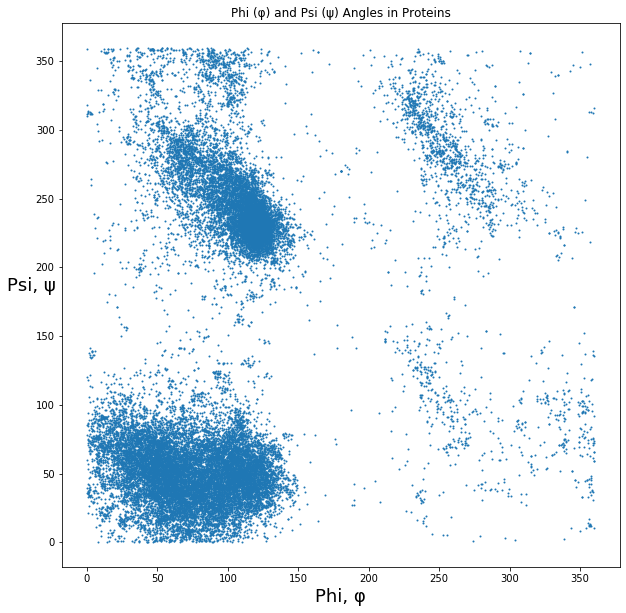

In [8]:
#2c
# Copy data
df_transform = df.copy()

# Transform data
df_transform['psi'] = (df_transform['psi'] + 270) % 360 
df_transform['phi'] = (df_transform['phi'] + 180) % 360

# Assign X, y values and plot
df_transform.plot.scatter(x='phi', y='psi', s=1)

# Create title and labels
plt.title('Phi (φ) and Psi (ψ) Angles in Proteins')
plt.xlabel('Phi, φ', size=18)
plt.ylabel('Psi, ψ', rotation="horizontal", size=18)

# Increase size of figure
plt.rcParams['figure.figsize'] = [10, 10]

plt.show()

## Shifting/translating
By rotating Psi and Phi we get a new composition and run the same loop with different k-values and generate new silhouette scores. Slightly surprisingly this time k = 4 gave the highest score, however k = 3 came extremely close.

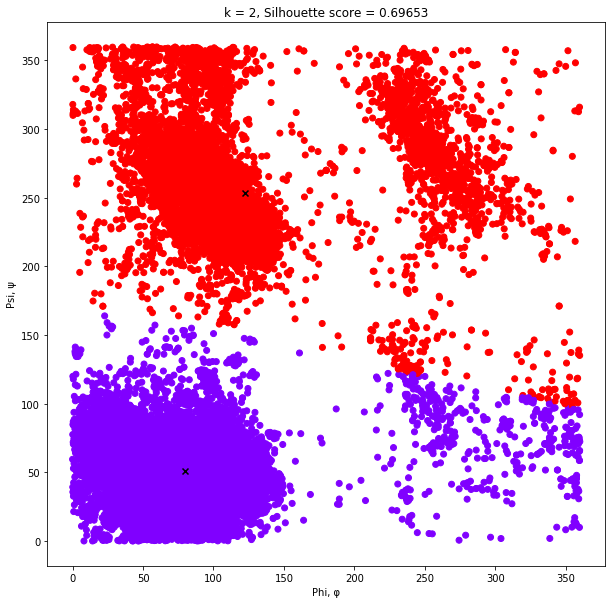

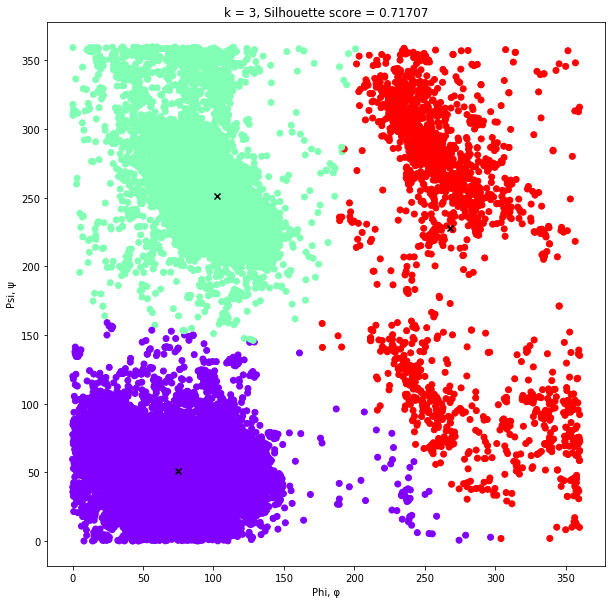

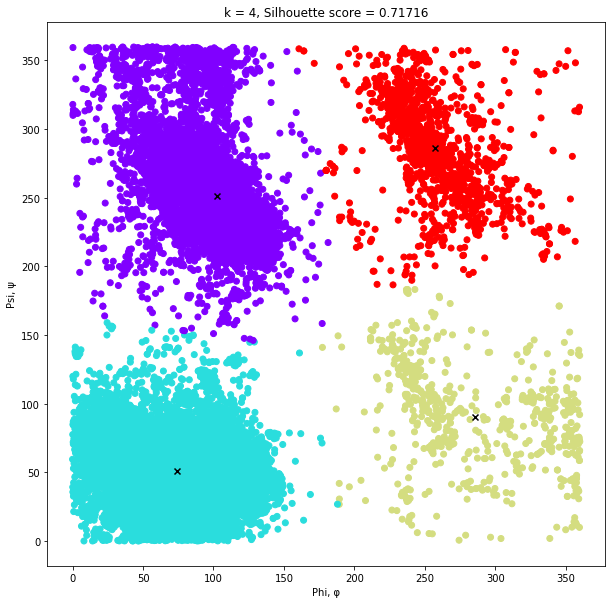

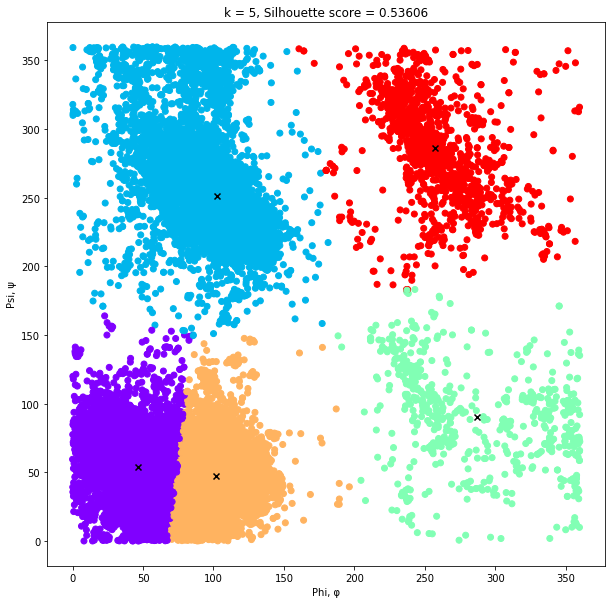

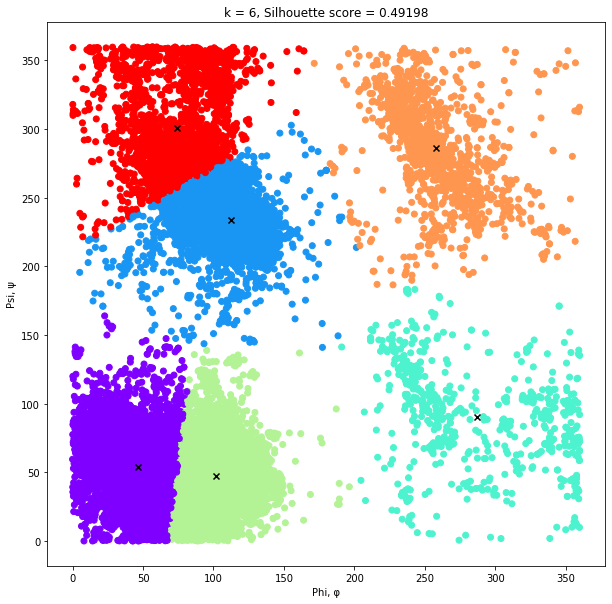

In [9]:
#2c
# Create a for loop that generates plots for k=2-6
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_transform[['phi', 'psi']])

    plt.scatter(x=df_transform['phi'], y=df_transform['psi'], 
                c=kmeans.labels_, 
                cmap='rainbow')

    plt.scatter(kmeans.cluster_centers_[:, 0], 
                kmeans.cluster_centers_[:, 1], 
                c='black', 
                marker='x')
        
    plt.title(f"k = {k}, Silhouette score = "
                     f"{silhouette_score(df_transform[['phi', 'psi']], kmeans.labels_):,.5f}")
    plt.xlabel('Phi, φ')
    plt.ylabel('Psi, ψ')
    
    plt.show()

## DBSCAN clustering

Next we clustered the data with the DBSCAN algorithm. This clustering technique is similar to Kmeans but with some differences.
The user now chooses and epsilon and a min distance from which the clustering is made. The epsilon decides the radius of the neighbourhood around a data point. The minimum points parameter is the minimum number of neighbouring points that are located within the epsilon radius from one another. Furthermore DBSCAN does not take into considaration outliers, these are instead labeled as noise points and are excluded from any cluster. This makes it so that DBSCAN is less sensitive to outlier data affecting the clusters.

### choosing epsilon

We choose minPts by doing a K-mean search. The K-mean chooses an appropriate K with the elbow method, i.e. choose the minPts where the graph starts to flatten. 


### choosing minPts

We found from many sources that one heurstic approach to choosing epsilon is to choose $\epsilon = 2*n$ where $n$ is the number of dimensions in the data set





Estimated number of clusters: 147
Estimated number of noise points: 1175


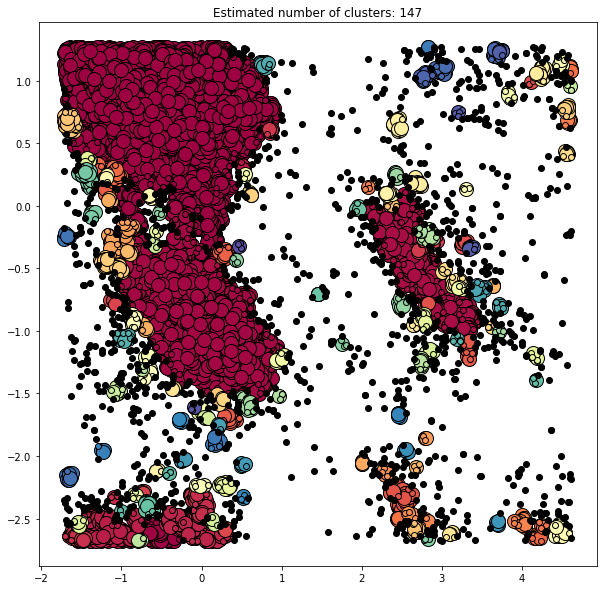

In [10]:
#3a
# Using code from "dbscan_intro" provided in course

db = DBSCAN(eps=3, min_samples=4).fit(df[['phi', 'psi']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
X = StandardScaler().fit_transform(df[['phi', 'psi']])
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

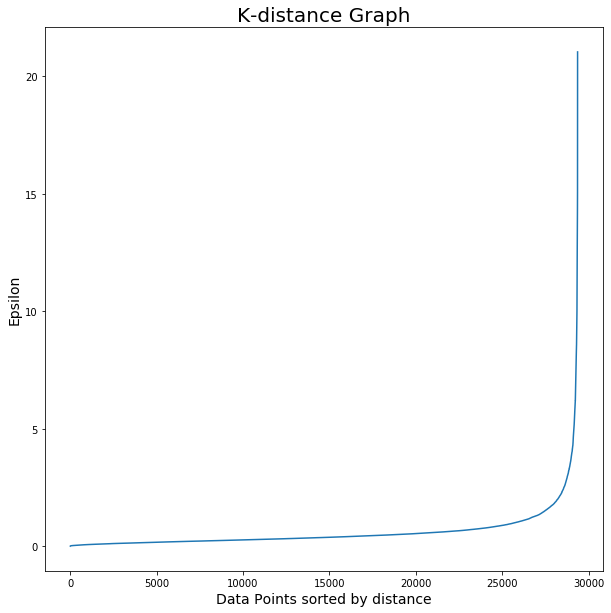

In [11]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df[['phi', 'psi']])
distances, indices = nbrs.kneighbors(df[['phi', 'psi']])

# Plotting K-distance Graph
#Here we choose the epsilon.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

## Bar plot of every residue together with their noise points

Next we did a bar plot to see which amino acid residue had the most noise, i.e. data points that didnt get clustered. According to the plot GLY is the residue with the most noise

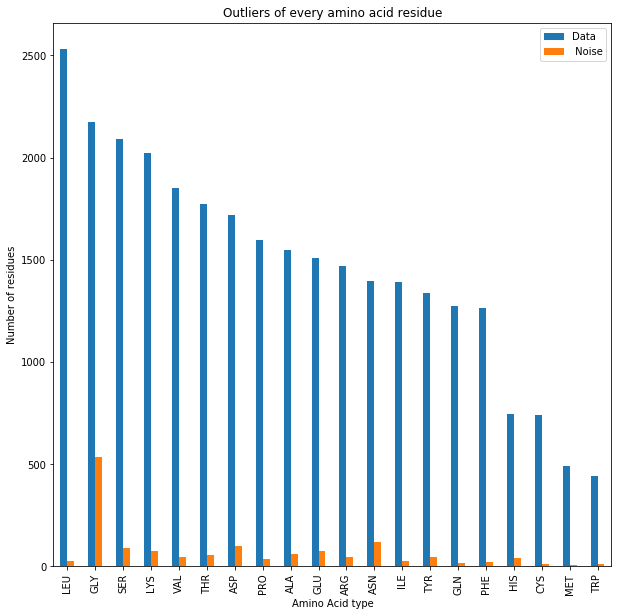

In [40]:

#count data and outliers, put the in data frames
data = df['residue name'].value_counts().to_frame()
df['outlier'] = db.labels_
dfoutliers = df[df.outlier == - 1]
z = dfoutliers['residue name'].value_counts().to_frame()

#merge data
data = data.merge(z,left_index = True, right_index = True)
data.columns = ['Data', ' Noise']

#Plot the bar plot
data.plot.bar()
plt.xlabel('Amino Acid type')
plt.ylabel('Number of residues')
plt.title('Outliers of every amino acid residue')
plt.show()

## K-means vs DBSCAN

Next we compare to clusters found by DBSCAN and K-means. We choose to compare the K-means cluster with the biggest silhoutte score and the first iteration of DBSCAN. From the graphs we can see that the major clusters are pretty much the same. The main difference is that K-means does not take outliers into consideration, all points are joined into clusters. This is clearly illustrated at -150 Psi and below where DBSCAN can identify two more clusters whereas K-means joins them to red and cyan.

Estimated number of clusters: 147
Estimated number of noise points: 1175


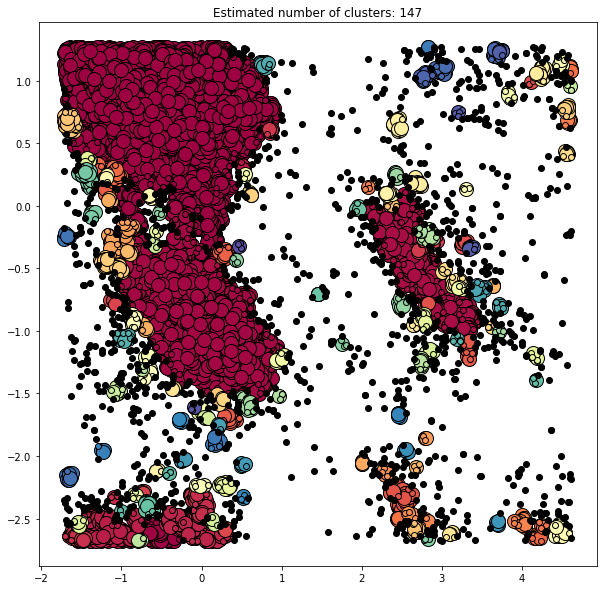

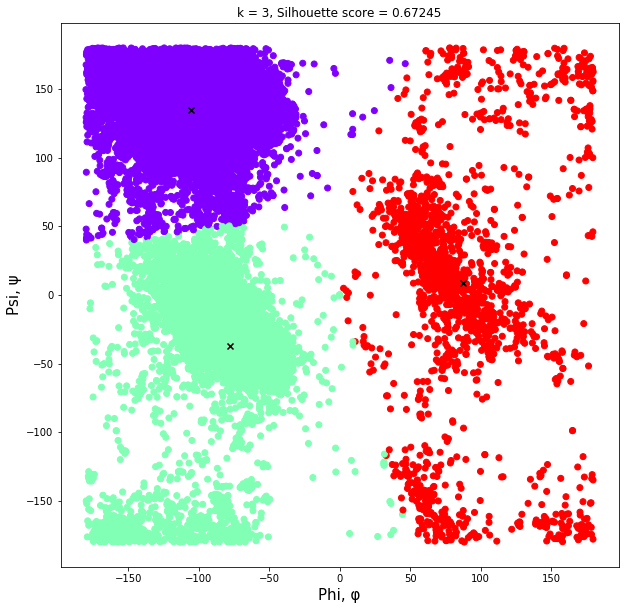

In [23]:
#3b Compare the clusters found by DBSCAN with thouse found by using K-means
db = DBSCAN(eps=3, min_samples=4).fit(df[['phi', 'psi']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
X = StandardScaler().fit_transform(df[['phi', 'psi']])
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0).fit(df[["phi", "psi"]])

plt.scatter(x=df["phi"], y=df['psi'], 
                c=kmeans.labels_, 
                cmap='rainbow')

plt.scatter(kmeans.cluster_centers_[:, 0], 
                kmeans.cluster_centers_[:, 1], 
                c='black', 
                marker='x')
        
plt.title(f"k = {3}, Silhouette score = "
                     f"{silhouette_score(df[['phi', 'psi']], kmeans.labels_):,.5f}")
plt.xlabel('Phi, φ', size=15)
plt.ylabel('Psi, ψ', size=15)
    
plt.show()


## The robustness of epsilon in DBSCAN

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Estimated number of clusters: 194
Estimated number of noise points: 928


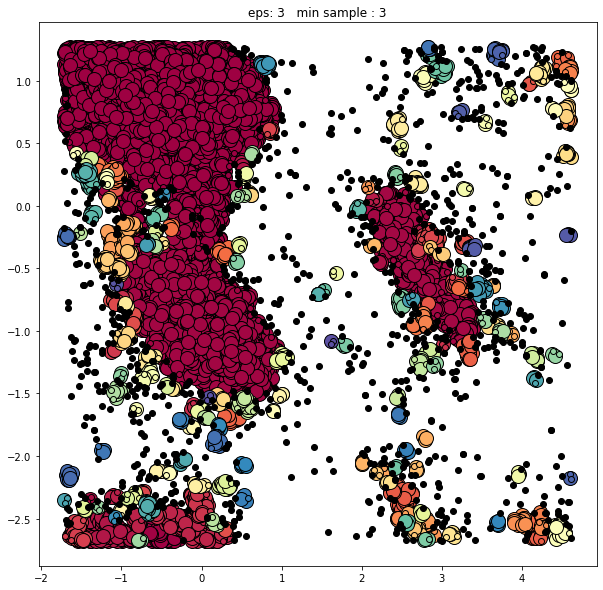

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Estimated number of clusters: 105
Estimated number of noise points: 708


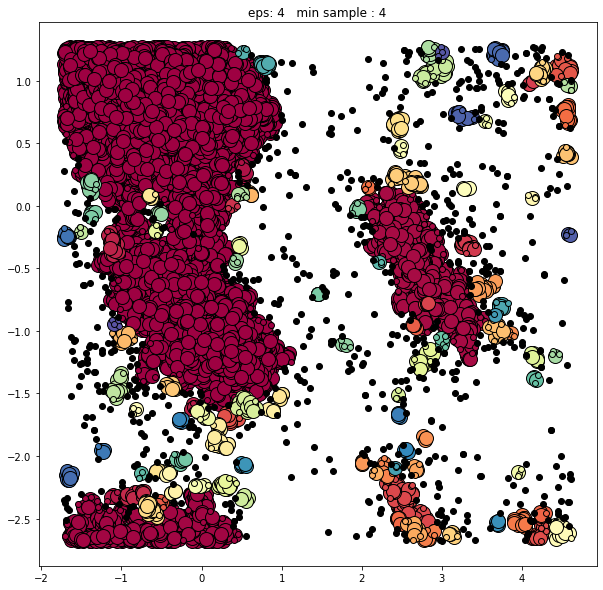

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Estimated number of clusters: 79
Estimated number of noise points: 471


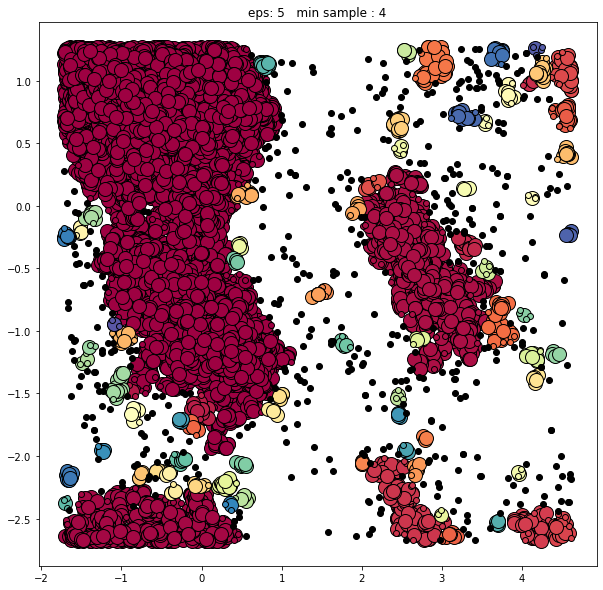

In [38]:
#3c här kollar vi om eps är robust vilket den inte verkar vara
#3,4
eps = 3
min_samples = 4
db = DBSCAN(eps, min_samples).fit(df[['phi', 'psi']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
X = StandardScaler().fit_transform(df[['phi', 'psi']])
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('eps: %d' % eps + '   ' + 'min sample : %d' % min_samples)
plt.show()

#4,4
eps = 4
min_samples = 4
db = DBSCAN(eps, min_samples).fit(df[['phi', 'psi']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
X = StandardScaler().fit_transform(df[['phi', 'psi']])
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('eps: %d' % eps + '   ' + 'min sample : %d' % min_samples)
plt.show()

#5,4
eps = 5
min_samples = 4
db = DBSCAN(eps, min_samples).fit(df[['phi', 'psi']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
X = StandardScaler().fit_transform(df[['phi', 'psi']])
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('eps: %d' % eps + '   ' + 'min sample : %d' % min_samples)
plt.show()




## The robustness of minPts in DBSCAN

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Estimated number of clusters: 194
Estimated number of noise points: 928


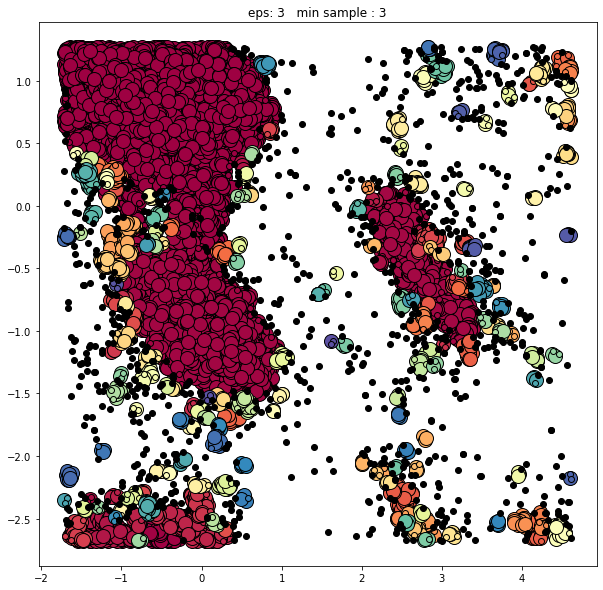

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Estimated number of clusters: 147
Estimated number of noise points: 1175


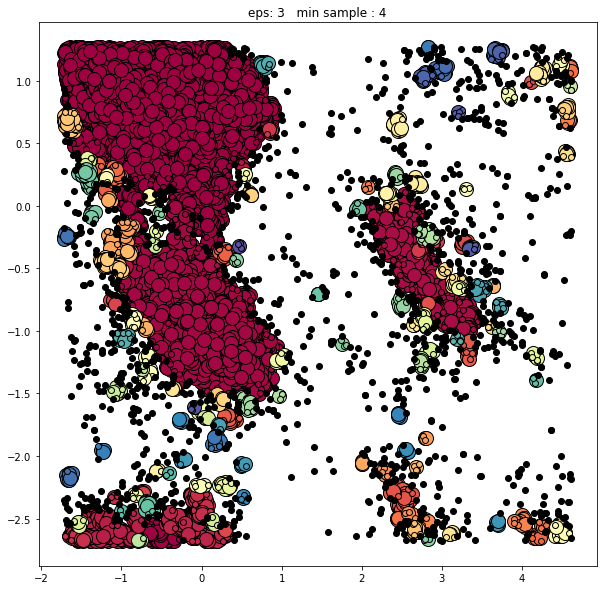

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Estimated number of clusters: 116
Estimated number of noise points: 1440


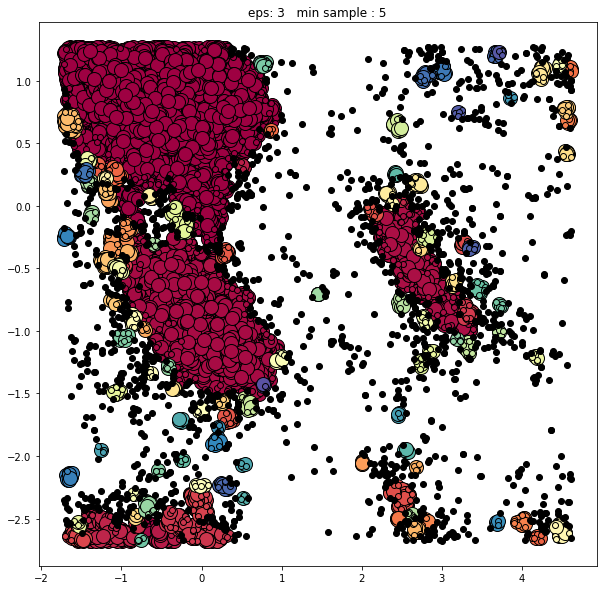

In [39]:
#3c här kollar vi om min sample är robust vilket den inte verkar vara
#3,4
eps = 3
min_samples = 3
db = DBSCAN(eps, min_samples).fit(df[['phi', 'psi']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
X = StandardScaler().fit_transform(df[['phi', 'psi']])
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('eps: %d' % eps + '   ' + 'min sample : %d' % min_samples)
plt.show()

#4,4
eps = 3
min_samples = 4
db = DBSCAN(eps, min_samples).fit(df[['phi', 'psi']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
X = StandardScaler().fit_transform(df[['phi', 'psi']])
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('eps: %d' % eps + '   ' + 'min sample : %d' % min_samples)
plt.show()

#5,4
eps = 3
min_samples = 5
db = DBSCAN(eps, min_samples).fit(df[['phi', 'psi']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
X = StandardScaler().fit_transform(df[['phi', 'psi']])
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('eps: %d' % eps + '   ' + 'min sample : %d' % min_samples)
plt.show()


## Robustness of DBSCAN
DBSCAN shows signs of being sensitive to changes in the hyperparameters. Just our small changes in epsilon and samples had a relatively large impact on the model, specially when compared to our K-means model. This is to be expected with regards the nature of how DBSCAN works, since outliers are taken in to consideration and it is more sensitive to distinct shapes and distances.

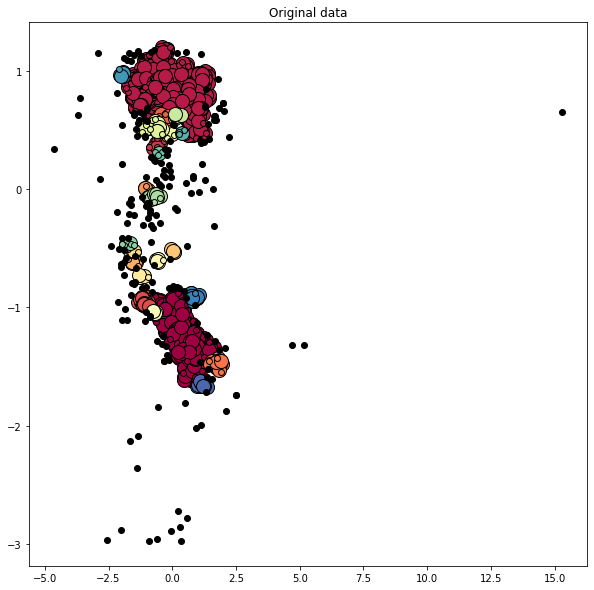

In [14]:
#4a
df = pd.read_csv('data_all.csv')
df_PRO = df[df['residue name'] == 'PRO']
db = DBSCAN(eps=3, min_samples=4).fit(df_PRO[['phi','psi']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
X = StandardScaler().fit_transform(df_PRO[['phi','psi']])
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Original data')
plt.show()

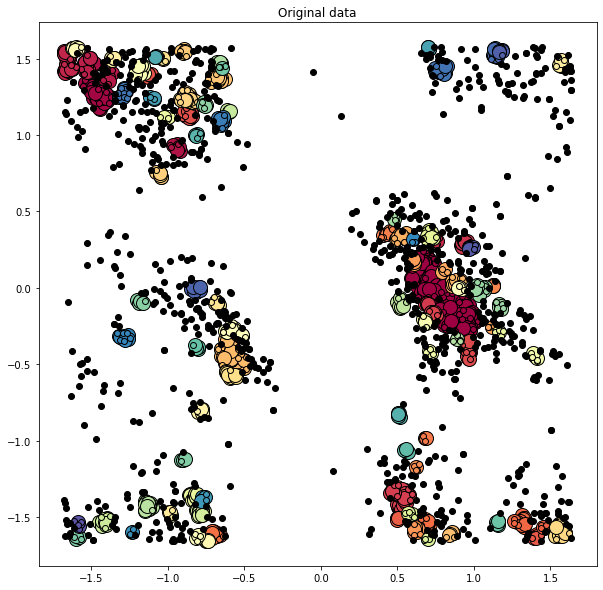

In [15]:
#4b
df_GLY = df[df['residue name'] == 'GLY']
db = DBSCAN(eps=3, min_samples=4).fit(df_GLY[['phi','psi']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
X = StandardScaler().fit_transform(df_GLY[['phi','psi']])
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Original data')
plt.show()